In [183]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [184]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [185]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median())
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [186]:
df['experience'] = df['experience'].fillna('zero')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [187]:
# Word to number or vice versa
from  word2number import w2n


df['experience'] = df['experience'].apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [188]:
df['experience'] = df['experience'].replace(0, df['experience'].median())
df


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,4,8.0,9,50000
1,4,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


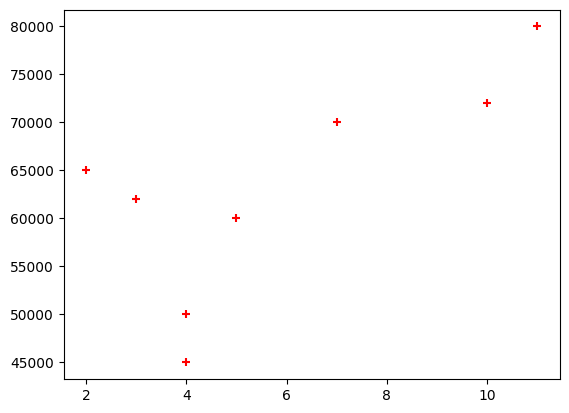

In [189]:
plt.scatter(df['experience'], df['salary($)'], color = 'red', marker='+')

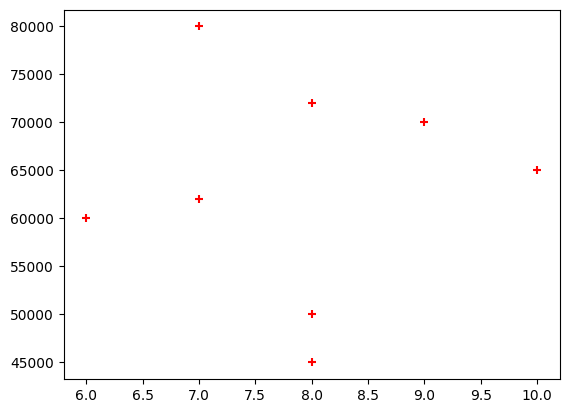

In [190]:
plt.scatter(df['test_score(out of 10)'],
            df['salary($)'], color='red', marker='+')

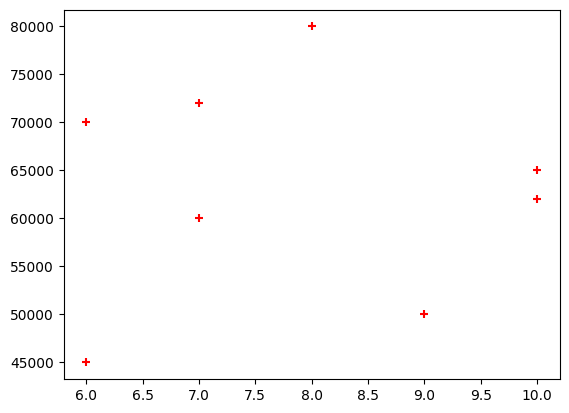

In [191]:
plt.scatter(df['interview_score(out of 10)'],
            df['salary($)'], color='red', marker='+')

In [192]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], df['salary($)'], train_size=0.8, random_state=10)

In [193]:
X_train

,experience,test_score(out of 10),interview_score(out of 10)
6,10,8.0,7
7,11,7.0,8
0,4,8.0,9
4,7,9.0,6
5,3,7.0,10
1,4,8.0,6


In [194]:
y_train

6    72000
7    80000
0    50000
4    70000
5    62000
1    45000
Name: salary($), dtype: int64

In [195]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [196]:
model.fit(X_train, y_train)

LinearRegression()

In [201]:
model.predict(X_test)

array([49853.77741673, 59679.1226645 ])

In [202]:
model.coef_

array([3909.0170593 , 2816.40942323, 3428.91957758])

In [203]:
model.intercept_

np.float64(-10592.201462225807)

In [204]:
model.score(X_test, y_test)

-9.500605466288217